**Questão 2 - Item a)** Problema: Problema: É útil para um usuário final (segurança, spam e afins)? Para isso, foram escolhidos 156 textos da base e separados em duas pastas: i) final_user: contém os textos com utilidade para um usuário final ii) no_final_user: contém os textos sem utilidade para um usuário final de computador.

In [ ]:
# Rotulando os dados
import os
import glob
import nltk
import random
import pandas as pd
import random
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

path1_final_user = '/content/final_user'
path2_no_final_user = '/content/no_final_user'

txt_corpus = []

# Lendo pasta 1
for filename in glob.glob(os.path.join(path1_final_user, '*.txt')):
	with open(filename, 'r') as f_in:
		txt_corpus.append([filename.split('/')[-1].split('.')[0], f_in.read()])

df_corpus = pd.DataFrame.from_records(txt_corpus)
df_corpus.columns = ["id", "content"]

# Lendo pasta 2
for filename in glob.glob(os.path.join(path2_no_final_user, '*.txt')):
	with open(filename, 'r') as f_in:
		txt_corpus.append([filename.split('/')[-1].split('.')[0], f_in.read()])

df_corpus = pd.DataFrame.from_records(txt_corpus)
df_corpus.columns = ["id", "content"]

In [ ]:
#from sklearn.utils import shuffle
#df_merge = shuffle(df_merge)
#df_merge.head(5)
df_corpus.insert(loc=0,column="label",value="")
for i in range(0,47):
  df_corpus['label'][i] = "yes"

for i in range(47,100):
  df_corpus['label'][i] = "no"

# **Questão 2 - Item b)**

In [ ]:
# STEP 1 - PREPARANDO OS DADOS
# Removendo as palavras que contém numeros
df_corpus['content'] = df_corpus['content'].replace(to_replace=r'\w*\d\w*', value='', regex=True)
df_corpus.head(5)

,label,id,content
51,no,011,uk net users leading tv downloads\n\nbritish t...
63,no,016,global blogger action day called\n\nthe global...
56,no,001,ink helps drive democracy in asia\n\nthe kyrgy...
20,yes,004,digital guru floats sub pc\n\nnicholas negro...
96,no,134,gates opens biggest gadget fair\n\nbill gates ...


In [ ]:
# Removendo pontuação
def remove_punctuation(text):
  return  re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

df_corpus['content'] = df_corpus['content'].apply(remove_punctuation) # Removendo pontuação

In [ ]:
df_corpus.content = df_corpus.content.str.lower()
df_corpus.content

51    uk net users leading tv downloads\n\nbritish t...
63    global blogger action day called\n\nthe global...
56    ink helps drive democracy in asia\n\nthe kyrgy...
20    digital guru floats sub   pc\n\nnicholas negro...
96    gates opens biggest gadget fair\n\nbill gates ...
                            ...                        
13    microsoft releases bumper patches\n\nmicrosoft...
66    eu software patent law faces axe\n\nthe europe...
83    playstation  chip to be unveiled\n\ndetails of...
94    us blogger fired by her airline\n\na us airlin...
42    google s toolbar sparks concern\n\nsearch engi...
Name: content, Length: 100, dtype: object

In [ ]:
# Embaralhando os dados
from sklearn.utils import shuffle

df_corpus = shuffle(df_corpus)
df_corpus.head(5)

,label,id,content
33,yes,187,a question of trust and technology\n\na major ...
66,no,014,eu software patent law faces axe\n\nthe europe...
62,no,113,viewers to be able to shape tv\n\nimagine edit...
58,no,128,commodore finds new lease of life\n\nthe once ...
73,no,118,progress on new internet domains\n\nby early ...


In [ ]:
# STEP 2 - SPLIT NOS DADOS
from sklearn.model_selection import train_test_split

x = df_corpus.content
y = df_corpus.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("X: ",x_train.head())
print("Y: ", y_train.head())

X:  41    microsoft seeking spyware trojan\n\nmicrosoft ...
28    rich pickings for hi tech thieves\n\nviruses  ...
49    pandas benefit from wireless net\n\nthe world ...
15    us duo in first spam conviction\n\na brother a...
63    global blogger action day called\n\nthe global...
Name: content, dtype: object
Y:  41    yes
28    yes
49     no
15    yes
63     no
Name: label, dtype: object


In [ ]:
# STEP 3 - ENCODE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(stop_words='english')
tfidf = TfidfVectorizer(stop_words='english')

x_train_cv = cv.fit_transform(x_train)
x_train_tfidf = tfidf.fit_transform(x_train)

x_test_cv = cv.transform(x_test)
x_test_tfidf = tfidf.transform(x_test)

print("x_train_cv: ", x_train_cv.toarray().shape)
print("x_train_tfidf: ", x_train_tfidf.toarray().shape)

x_train_cv:  (70, 4916)
x_train_tfidf:  (70, 4916)


In [ ]:
# STEP 4 - FIT NO MODELO
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

lr_cv = LogisticRegression()
lr_tfidf = LogisticRegression()

lr_cv.fit(x_train_cv, y_train)
lr_tfidf.fit(x_train_tfidf, y_train)

y_pred_lr_cv = lr_cv.predict(x_test_cv)
y_pred_lr_tfidf = lr_tfidf.predict(x_test_tfidf)

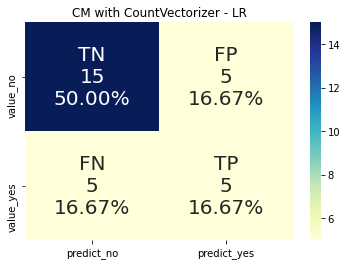

In [ ]:
# STEP 5 - EVALUATE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CountVectorizer
lr_cm_cv = confusion_matrix(y_test, y_pred_lr_cv)
categ = ['No', 'Yes']
gnames_lr_cv = ['TN', 'FP', 'FN', 'TP']
gcounts_lr_cv = ['{0:0.0f}' .format(value) for value in lr_cm_cv.flatten()]
gpercent_lr_cv = ['{0:.2%}'.format(value) for value in lr_cm_cv.flatten()/np.sum(lr_cm_cv)]
labels_lr_cv = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(gnames_lr_cv,gcounts_lr_cv,gpercent_lr_cv)]
labels_lr_cv = np.asarray(labels_lr_cv).reshape(2,2)
sns.heatmap(lr_cm_cv, annot=labels_lr_cv, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'],fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu");
plt.title('CM with CountVectorizer - LR');

In [ ]:
# Metrics
true_neg_lr_cv, false_pos_lr_cv = lr_cm_cv[0]
false_neg_lr_cv, true_pos_lr_cv = lr_cm_cv[1]
accuracy_lr_cv = round((true_pos_lr_cv + true_neg_lr_cv) / (true_pos_lr_cv + true_neg_lr_cv + false_pos_lr_cv + false_neg_lr_cv),4)
precision_lr_cv = round((true_pos_lr_cv) / (true_pos_lr_cv + false_pos_lr_cv),4)
recall_lr_cv = round((true_pos_lr_cv) / (true_pos_lr_cv + false_neg_lr_cv),4)
f1_lr_cv = round(2 * (precision_lr_cv * recall_lr_cv) / (precision_lr_cv + recall_lr_cv),4)

print("Count Vectorizer Metrics:")
print('Accuracy Logistic Regression: ', accuracy_lr_cv)
print('Precision Logistic Regression: ', precision_lr_cv)
print('Recall Logistic Regression: ', recall_lr_cv)
print('F1 Score Logistic Regression: ', f1_lr_cv)

Count Vectorizer Metrics:
Accuracy Logistic Regression:  0.6667
Precision Logistic Regression:  0.5
Recall Logistic Regression:  0.5
F1 Score Logistic Regression:  0.5


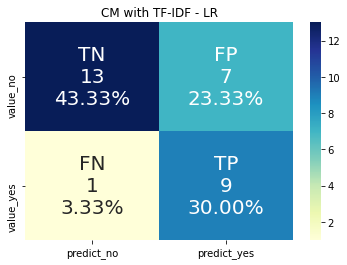

In [ ]:
# TF-IDF
lr_cm_tfidf = confusion_matrix(y_test, y_pred_lr_tfidf)
categ = ['No', 'Yes']
gnames_lr_tfidf = ['TN', 'FP', 'FN', 'TP']
gcounts_lr_tfidf = ['{0:0.0f}' .format(value) for value in lr_cm_tfidf.flatten()]
gpercent_lr_tfidf = ['{0:.2%}'.format(value) for value in lr_cm_tfidf.flatten()/np.sum(lr_cm_tfidf)]
labels_lr_tfidf = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(gnames_lr_tfidf,gcounts_lr_tfidf,gpercent_lr_tfidf)]
labels_lr_tfidf = np.asarray(labels_lr_tfidf).reshape(2,2)
sns.heatmap(lr_cm_tfidf, annot=labels_lr_tfidf, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'],fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu");
plt.title('CM with TF-IDF - LR');

In [ ]:
# Metrics TF-IDF
true_neg_lr_tfidf, false_pos_lr_tfidf = lr_cm_tfidf[0]
false_neg_lr_tfidf, true_pos_lr_tfidf = lr_cm_tfidf[1]
accuracy_lr_tfidf = round((true_pos_lr_tfidf + true_neg_lr_tfidf) / (true_pos_lr_tfidf + true_neg_lr_tfidf + false_pos_lr_tfidf + false_neg_lr_tfidf),4)
precision_lr_tfidf = round((true_pos_lr_tfidf) / (true_pos_lr_tfidf + false_pos_lr_tfidf),4)
recall_lr_tfidf = round((true_pos_lr_tfidf) / (true_pos_lr_tfidf + false_neg_lr_tfidf),4)
f1_lr_tfidf = round(2 * (precision_lr_tfidf * recall_lr_tfidf) / (precision_lr_tfidf + recall_lr_tfidf),4)

print("TF-IDF Metrics:")
print('Accuracy Logistic Regression: ', accuracy_lr_tfidf)
print('Precision Logistic Regression: ', precision_lr_tfidf)
print('Recall Logistic Regression: ', recall_lr_tfidf)
print('F1 Score Logistic Regression: ', f1_lr_tfidf)

TF-IDF Metrics:
Accuracy Logistic Regression:  0.7333
Precision Logistic Regression:  0.5625
Recall Logistic Regression:  0.9
F1 Score Logistic Regression:  0.6923


**Questão 2 - Item d)**

In [ ]:
# STEP 4 - FIT NO MODELO
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_cv = MultinomialNB()
nb_tfidf = MultinomialNB()

nb_cv.fit(x_train_cv, y_train)
nb_tfidf.fit(x_train_tfidf, y_train)

y_pred_nb_cv = nb_cv.predict(x_test_cv)
y_pred_nb_tfidf = nb_tfidf.predict(x_test_tfidf)

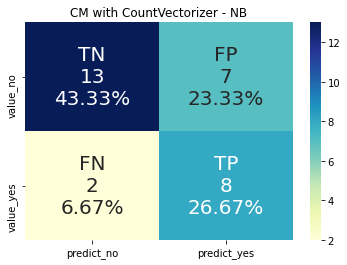

In [ ]:
# STEP 5 - EVALUATE
# CountVectorizer
nb_cm_cv = confusion_matrix(y_test, y_pred_nb_cv)
categ = ['No', 'Yes']
gnames_nb_cv = ['TN', 'FP', 'FN', 'TP']
gcounts_nb_cv = ['{0:0.0f}' .format(value) for value in nb_cm_cv.flatten()]
gpercent_nb_cv = ['{0:.2%}'.format(value) for value in nb_cm_cv.flatten()/np.sum(nb_cm_cv)]
labels_nb_cv = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(gnames_nb_cv,gcounts_nb_cv,gpercent_nb_cv)]
labels_nb_cv = np.asarray(labels_nb_cv).reshape(2,2)
sns.heatmap(nb_cm_cv, annot=labels_nb_cv, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'],fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu");
plt.title('CM with CountVectorizer - NB');

In [ ]:
# Metrics CountVectorizer
true_neg_nb_cv, false_pos_nb_cv = nb_cm_cv[0]
false_neg_nb_cv, true_pos_nb_cv = nb_cm_cv[1]
accuracy_nb_cv = round((true_pos_nb_cv + true_neg_nb_cv) / (true_pos_nb_cv + true_neg_nb_cv + false_pos_nb_cv + false_neg_nb_cv),4)
precision_nb_cv = round((true_pos_nb_cv) / (true_pos_nb_cv + false_pos_nb_cv),4)
recall_nb_cv = round((true_pos_nb_cv) / (true_pos_nb_cv + false_neg_nb_cv),4)
f1_nb_cv = round(2 * (precision_nb_cv * recall_nb_cv) / (precision_nb_cv + recall_nb_cv),4)

print("CountVectorizer Metrics:")
print('Accuracy Logistic Regression: ', accuracy_nb_cv)
print('Precision Logistic Regression: ', precision_nb_cv)
print('Recall Logistic Regression: ', recall_nb_cv)
print('F1 Score Logistic Regression: ', f1_nb_cv)

CountVectorizer Metrics:
Accuracy Logistic Regression:  0.7
Precision Logistic Regression:  0.5333
Recall Logistic Regression:  0.8
F1 Score Logistic Regression:  0.64


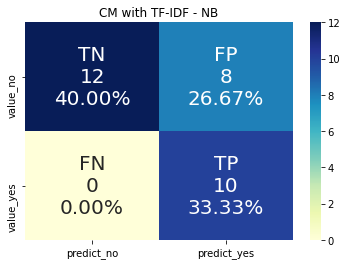

In [ ]:
# TF-IDF
nb_cm_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
categ = ['No', 'Yes']
gnames_nb_tfidf = ['TN', 'FP', 'FN', 'TP']
gcounts_nb_tfidf = ['{0:0.0f}' .format(value) for value in nb_cm_tfidf.flatten()]
gpercent_nb_tfidf = ['{0:.2%}'.format(value) for value in nb_cm_tfidf.flatten()/np.sum(nb_cm_tfidf)]
labels_nb_tfidf = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(gnames_nb_tfidf,gcounts_nb_tfidf,gpercent_nb_tfidf)]
labels_nb_tfidf = np.asarray(labels_nb_tfidf).reshape(2,2)
sns.heatmap(nb_cm_tfidf, annot=labels_nb_tfidf, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'],fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu");
plt.title('CM with TF-IDF - NB');

In [ ]:
# Metrics TF-IDF
true_neg_nb_tfidf, false_pos_nb_tfidf = nb_cm_tfidf[0]
false_neg_nb_tfidf, true_pos_nb_tfidf = nb_cm_tfidf[1]
accuracy_nb_tfidf = round((true_pos_nb_tfidf + true_neg_nb_tfidf) / (true_pos_nb_tfidf + true_neg_nb_tfidf + false_pos_nb_tfidf + false_neg_nb_tfidf),4)
precision_nb_tfidf = round((true_pos_nb_tfidf) / (true_pos_nb_tfidf + false_pos_nb_tfidf),4)
recall_nb_tfidf = round((true_pos_nb_tfidf) / (true_pos_nb_tfidf + false_neg_nb_tfidf),4)
f1_nb_tfidf = round(2 * (precision_nb_tfidf * recall_nb_tfidf) / (precision_nb_tfidf + recall_nb_tfidf),4)

print("TF-IDF Metrics:")
print('Accuracy Logistic Regression: ', accuracy_nb_tfidf)
print('Precision Logistic Regression: ', precision_nb_tfidf)
print('Recall Logistic Regression: ', recall_nb_tfidf)
print('F1 Score Logistic Regression: ', f1_nb_tfidf)

TF-IDF Metrics:
Accuracy Logistic Regression:  0.7333
Precision Logistic Regression:  0.5556
Recall Logistic Regression:  1.0
F1 Score Logistic Regression:  0.7143


**Questão 2 - Item e)**

In [ ]:
# Evaluate DecisionTree
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_cv = DecisionTreeClassifier()
dt_tfidf = DecisionTreeClassifier()

dt_cv.fit(x_train_cv, y_train)
dt_tfidf.fit(x_train_tfidf, y_train)

y_pred_dt_cv = dt_cv.predict(x_test_cv)
y_pred_dt_tfidf = dt_tfidf.predict(x_test_tfidf)

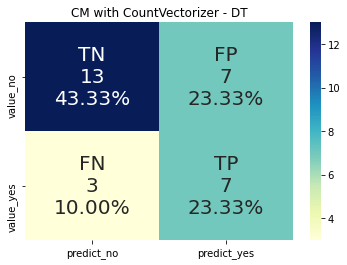

In [ ]:
# STEP 5 - EVALUATE
# CountVectorizer
dt_cm_cv = confusion_matrix(y_test, y_pred_dt_cv)
categ = ['No', 'Yes']
gnames_dt_cv = ['TN', 'FP', 'FN', 'TP']
gcounts_dt_cv = ['{0:0.0f}' .format(value) for value in dt_cm_cv.flatten()]
gpercent_dt_cv = ['{0:.2%}'.format(value) for value in dt_cm_cv.flatten()/np.sum(dt_cm_cv)]
labels_dt_cv = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(gnames_dt_cv,gcounts_dt_cv,gpercent_dt_cv)]
labels_dt_cv = np.asarray(labels_dt_cv).reshape(2,2)
sns.heatmap(dt_cm_cv, annot=labels_dt_cv, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'],fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu");
plt.title('CM with CountVectorizer - DT');

In [ ]:
# Metrics Count Vectorizer
true_neg_dt_cv, false_pos_dt_cv = dt_cm_cv[0]
false_neg_dt_cv, true_pos_dt_cv = dt_cm_cv[1]
accuracy_dt_cv = round((true_pos_dt_cv + true_neg_dt_cv) / (true_pos_dt_cv + true_neg_dt_cv + false_pos_dt_cv + false_neg_dt_cv),4)
precision_dt_cv = round((true_pos_dt_cv) / (true_pos_dt_cv + false_pos_dt_cv),4)
recall_dt_cv = round((true_pos_dt_cv) / (true_pos_dt_cv + false_neg_dt_cv),4)
f1_dt_cv = round(2 * (precision_dt_cv * recall_dt_cv) / (precision_dt_cv + recall_dt_cv),4)

print("CountVectorizer Metrics:")
print('Accuracy Logistic Regression: ', accuracy_dt_cv)
print('Precision Logistic Regression: ', precision_dt_cv)
print('Recall Logistic Regression: ', recall_dt_cv)
print('F1 Score Logistic Regression: ', f1_dt_cv)

CountVectorizer Metrics:
Accuracy Logistic Regression:  0.6667
Precision Logistic Regression:  0.5
Recall Logistic Regression:  0.7
F1 Score Logistic Regression:  0.5833


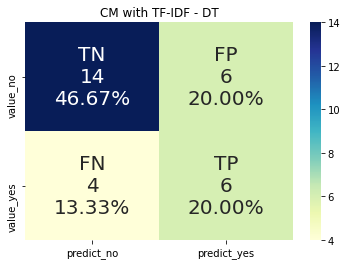

In [ ]:
# CountVectorizer
dt_cm_tfidf = confusion_matrix(y_test, y_pred_dt_tfidf)
categ = ['No', 'Yes']
gnames_dt_tfidf = ['TN', 'FP', 'FN', 'TP']
gcounts_dt_tfidf = ['{0:0.0f}' .format(value) for value in dt_cm_tfidf.flatten()]
gpercent_dt_tfidf = ['{0:.2%}'.format(value) for value in dt_cm_tfidf.flatten()/np.sum(dt_cm_tfidf)]
labels_dt_tfidf = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(gnames_dt_tfidf,gcounts_dt_tfidf,gpercent_dt_tfidf)]
labels_dt_tfidf = np.asarray(labels_dt_tfidf).reshape(2,2)
sns.heatmap(dt_cm_tfidf, annot=labels_dt_tfidf, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'],fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu");
plt.title('CM with TF-IDF - DT');

In [ ]:
# Metrics TF-IDF
true_neg_dt_tfidf, false_pos_dt_tfidf = dt_cm_tfidf[0]
false_neg_dt_tfidf, true_pos_dt_tfidf = dt_cm_tfidf[1]
accuracy_dt_tfidf = round((true_pos_dt_tfidf + true_neg_dt_tfidf) / (true_pos_dt_tfidf + true_neg_dt_tfidf + false_pos_dt_tfidf + false_neg_dt_tfidf),4)
precision_dt_tfidf = round((true_pos_dt_tfidf) / (true_pos_dt_tfidf + false_pos_dt_tfidf),4)
recall_dt_tfidf = round((true_pos_dt_tfidf) / (true_pos_dt_tfidf + false_neg_dt_tfidf),4)
f1_dt_tfidf = round(2 * (precision_dt_tfidf * recall_dt_tfidf) / (precision_dt_tfidf + recall_dt_tfidf),4)

print("TF-IDF Metrics:")
print('Accuracy Logistic Regression: ', accuracy_dt_tfidf)
print('Precision Logistic Regression: ', precision_dt_tfidf)
print('Recall Logistic Regression: ', recall_dt_tfidf)
print('F1 Score Logistic Regression: ', f1_dt_tfidf)

TF-IDF Metrics:
Accuracy Logistic Regression:  0.6667
Precision Logistic Regression:  0.5
Recall Logistic Regression:  0.6
F1 Score Logistic Regression:  0.5455


**Questão 2 - Item f)**

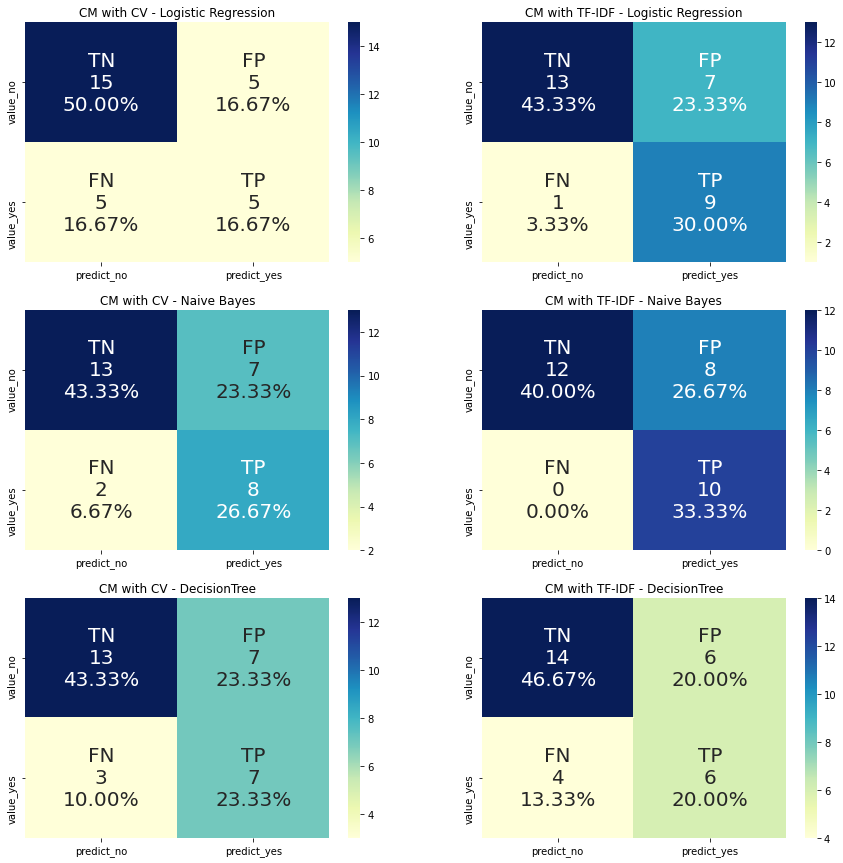

In [ ]:
plt.figure(figsize = [15,15])
plt.subplot(3, 2, 1)
sns.heatmap(lr_cm_cv, annot=labels_lr_cv, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'], fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('CM with CV - Logistic Regression');
plt.subplot(3, 2, 2)
sns.heatmap(lr_cm_tfidf, annot=labels_lr_tfidf, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'], fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('CM with TF-IDF - Logistic Regression');
plt.subplot(3, 2, 3)
sns.heatmap(nb_cm_cv, annot=labels_nb_cv, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'], fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('CM with CV - Naive Bayes');
plt.subplot(3, 2, 4)
sns.heatmap(nb_cm_tfidf, annot=labels_nb_tfidf, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'], fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('CM with TF-IDF - Naive Bayes');
plt.subplot(3, 2, 5)
sns.heatmap(dt_cm_cv, annot=labels_dt_cv, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'], fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('CM with CV - DecisionTree');
plt.subplot(3, 2, 6)
sns.heatmap(dt_cm_tfidf, annot=labels_dt_tfidf, xticklabels=['predict_no','predict_yes'],\
            yticklabels=['value_no','value_yes'], fmt='', annot_kws={'fontsize':20}, cmap="YlGnBu")
plt.title('CM with TF-IDF - DecisionTree');
plt.show()

In [ ]:
# Metrics
print("*****CV ACCURACY*******")
print('Logistic Regression----', accuracy_lr_cv)
print('Naive Bayes------------', accuracy_nb_cv)
print('Decision Tree----------', accuracy_dt_cv)
print("****TF-IDF ACCURACY****")
print('Logistic Regression----', accuracy_lr_tfidf)
print('Naive Bayes------------', accuracy_nb_tfidf)
print('Decision Tree----------', accuracy_dt_tfidf)
print('\n')
print("******CV PRECISION*****")
print('Logistic Regression----', precision_lr_cv)
print('Naive Bayes------------', precision_nb_cv)
print('Decision Tree----------', precision_dt_cv)
print("***TF-IDF PRECISION****")
print('Logistic Regression----', precision_lr_tfidf)
print('Naive Bayes------------', precision_nb_tfidf)
print('Decision Tree----------', precision_dt_tfidf)
print('\n')
print("*******CV RECALL*******")
print('Logistic Regression----', recall_lr_cv)
print('Naive Bayes------------', recall_nb_cv)
print('Decision Tree----------', recall_dt_cv)
print("*****TF-IDF RECALL*****")
print('Logistic Regression----', recall_lr_tfidf)
print('Naive Bayes------------', recall_nb_tfidf)
print('Decision Tree----------', recall_dt_tfidf)
print('\n')
print("******CV F1 SCORE*******")
print('Logistic Regression ---', f1_lr_cv)
print('Naive Bayes -----------', f1_nb_cv)
print('Decision Tree ---------', f1_dt_cv)
print("****TF-IDF F1 SCORE****")
print('Logistic Regression----', f1_lr_tfidf)
print('Naive Bayes------------', f1_nb_tfidf)
print('Decision Tree----------', f1_dt_tfidf)

*****CV ACCURACY*******
Logistic Regression---- 0.6667
Naive Bayes------------ 0.7
Decision Tree---------- 0.6667
****TF-IDF ACCURACY****
Logistic Regression---- 0.7333
Naive Bayes------------ 0.7333
Decision Tree---------- 0.6667


******CV PRECISION*****
Logistic Regression---- 0.5
Naive Bayes------------ 0.5333
Decision Tree---------- 0.5
***TF-IDF PRECISION****
Logistic Regression---- 0.5625
Naive Bayes------------ 0.5556
Decision Tree---------- 0.5


*******CV RECALL*******
Logistic Regression---- 0.5
Naive Bayes------------ 0.8
Decision Tree---------- 0.7
*****TF-IDF RECALL*****
Logistic Regression---- 0.9
Naive Bayes------------ 1.0
Decision Tree---------- 0.6


******CV F1 SCORE*******
Logistic Regression --- 0.5
Naive Bayes ----------- 0.64
Decision Tree --------- 0.5833
****TF-IDF F1 SCORE****
Logistic Regression---- 0.6923
Naive Bayes------------ 0.7143
Decision Tree---------- 0.5455
